In [1]:
# Essential libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


In [3]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_150"

In [4]:
CATEGORIES = ["normal_resized150", "abnormal_resized150"]

In [5]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [6]:
# Reshaping the images as 1D array because the model takes images
# as 1D array. Also made the labels a numpy array.

X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [9]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

193
193
83
83


SUPPORT VECTOR MACHINE

In [10]:
from sklearn.svm import SVC
model = SVC()

In [11]:
model.fit(X_train, y_train)

SVC()

In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.score(X_test,y_test)

1.0

AFTER HYPERPARAMETER TUNING

In [14]:
model_C = SVC(C=55)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [15]:
model_g = SVC(gamma=55) # Use gamma = "scale"
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.46987951807228917

In [16]:
# Gives 74% on sigmoid and precomputed cannot be computed due to not being a square matrix

model_linear_kernal = SVC(kernel='sigmoid') 
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.7469879518072289

USING PIPELINE METHOD FOR HYPERPARAMETERS TUNING

In [17]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [18]:
y_predicted = model1.predict(X_test)

In [19]:
model1.score(X_test,y_test)

0.9879518072289156

The true label says it is a abnormal gait
The model predicted it to be a abnormal gait


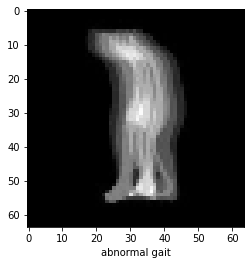

In [20]:
# predict with the trained model 

n = 77
labels = ["abnormal gait","normal gait"]
sample_image = X_test[n]
sample_label = y_test[n]
predicted_label = y_predicted[n]
model1.predict([sample_image])
print("The true label says it is a", labels[predicted_label])
print("The model predicted it to be a", labels[sample_label])


# To see the predicted image, we need to change the 1D array to 2D array

example = np.reshape(sample_image, (64, 64))
plt.imshow(example, cmap = "gray")
plt.xlabel(labels[sample_label])
plt.show()

In [21]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.97      1.00      0.99        39

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  1],
       [ 0, 39]])

Text(15.0, 0.5, 'Truth')

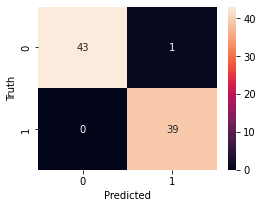

In [23]:
# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(),X_train, y_train, cv=5)

In [25]:
scores

array([0.8974359 , 0.92307692, 1.        , 1.        , 0.86842105])

In [26]:
np.average(scores)

0.9377867746288799

In [27]:
np.max(scores)

1.0

In [30]:
y_true = y_test

In [31]:
from sklearn.metrics import recall_score
recall_score(y_true, y_predicted, pos_label=0)

0.9772727272727273

In [33]:
import sklearn
sensitivity = sklearn.metrics.recall_score(y_true , y_predicted)
sensitivity

1.0

In [34]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_predicted))
specificity

0.9772727272727273

In [36]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [37]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9772727272727273
1.0
0.975
1.0
